In [74]:
working_dir = '/mnt/c/users/fordd/Downloads/RW_PGM_FE/'
py_files_dir =  working_dir+'py_files/'
saved_arrays_dir = working_dir+'saved_arrays/'
saved_models_dir = working_dir+'saved_models/'

In [75]:
import os

os.chdir(py_files_dir)

from utils import *

os.chdir(working_dir)

In [78]:
import matplotlib as mpl
#mpl.rc('xtick', labelsize=11) 
#mpl.rc('ytick', labelsize=11) 

In [79]:
delta_f_ground_truth = np.array([0.19308704, 1.10727756, 0.        , 2.86034197])
n_states = len(delta_f_ground_truth)

In [80]:
estimates, grid, AVMD_f_T_all, AVMD_S_T_all =  load_pickle_(saved_arrays_dir+'AD300b_est_grid_AVall')

av_u_GT = np.array([0.74446571, 2.13347893, 0.        , 2.41270697])

In [81]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=11) 
mpl.rc('ytick', labelsize=11) 
plt.style.use('classic')
%matplotlib inline
fontname = 'Times New Roman'
plt.rcParams["font.family"] = fontname
plt.rcParams['font.size'] = 15
default_colours = [
'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

In [82]:
plt.rcParams['font.size'] = 14

2


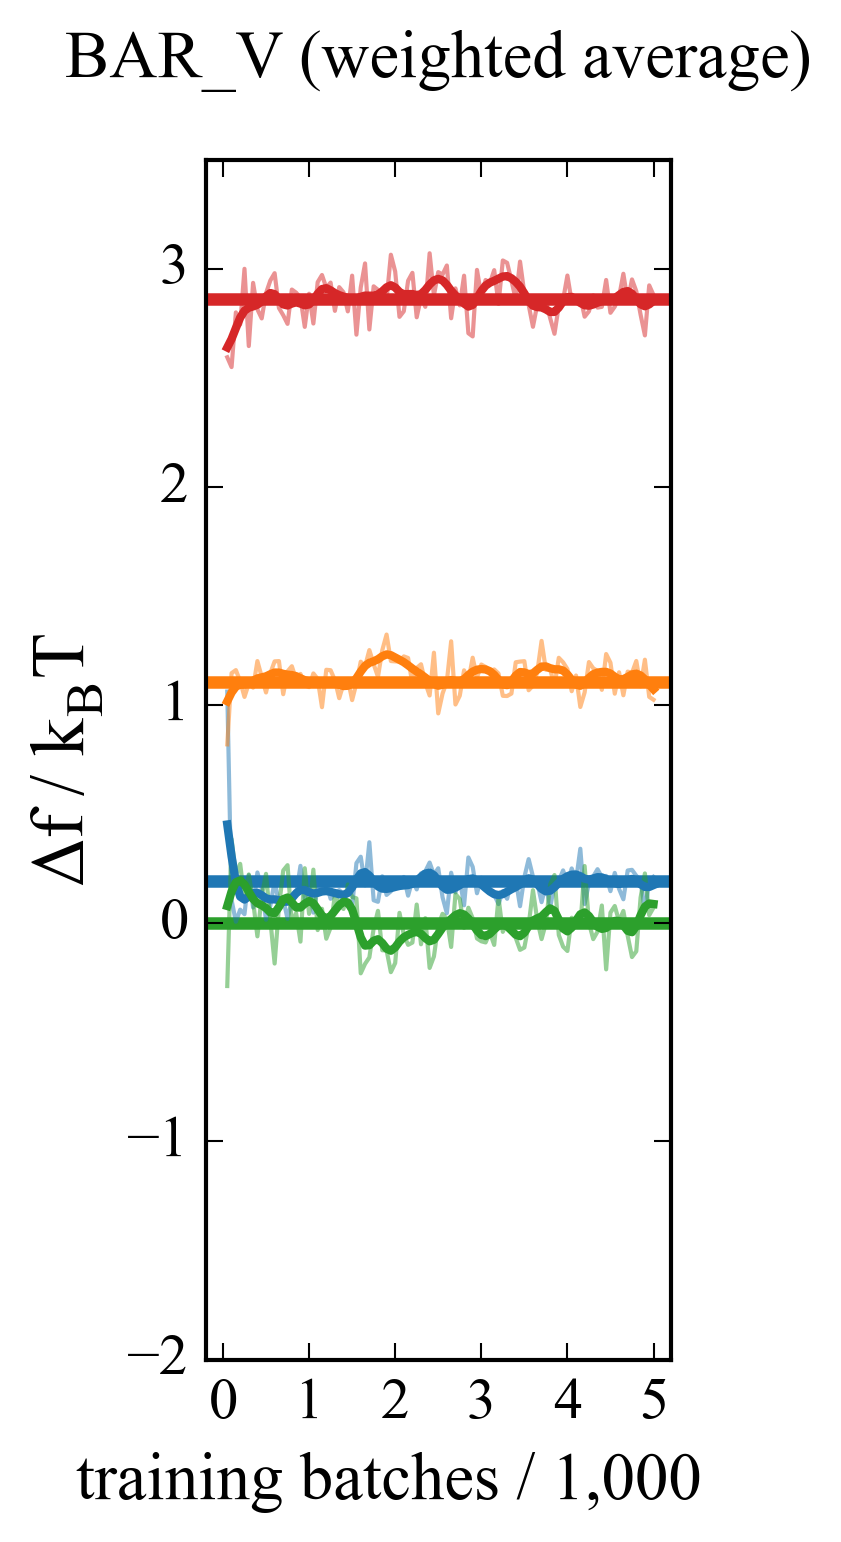

In [89]:
ind_min = np.argmin(delta_f_ground_truth)
print(ind_min)

name =  7 # 12


if type(name) is int:
    start =  10 
    end = 40000000000   
    x = fs_to_deltafs_(estimates[:,:,name].T, ind_min=ind_min, start=start, median=True) # (m,n_states)
    xL = x - np.nan
    xU = x + np.nan
    if name == 0: name = 'AVMD_T'
    elif name == 1: name = 'AVMD_V'
    elif name == 2:
        name = 'AVBG'
        x = fs_to_deltafs_(np.array(av_BG.T), ind_min=ind_min, start=start)
        xL = x - np.nan
        xU = x + np.nan
    elif name == 3: name = 'EXPMD_T'
    elif name == 4: name = 'EXPMD_V'
    elif name == 5: name = 'EXPBG'
    elif name == 6: name = 'BAR_T (weighted average)'
    elif name == 7: name = 'BAR_V (weighted average)'
    elif name == 11: name = 'BAR_T (direct average)'
    elif name == 12: name = 'BAR_V (direct average)'
    else: print('not')
else: pass

#x-= 0.5
fig = plt.figure(figsize=(2,5),dpi=300, facecolor="white")
[plt.plot([-400,grid[-1]+400],[delta_f_ground_truth[k]]*2, color=default_colours[k], linewidth=3, zorder=-10) for k in range(n_states)]

[plt.plot(grid, x[:,k], color=default_colours[k], alpha=0.5, linewidth=1) for k in range(n_states)]

[plt.fill_between(grid,
                 xL[:,k], # simple_smoother_(xL[:,k],c=0.6),
                 xU[:,k], # simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.2,
                 color='black',
                
                ) for k in range(n_states)]
[plt.fill_between(grid,
                 simple_smoother_(xL[:,k],c=0.6),
                 simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.5,
                 color=default_colours[k],
                
                ) for k in range(n_states)]

[plt.plot(grid, simple_smoother_(x[:,k],c=0.6), color=default_colours[k], linewidth=2) for k in range(n_states)]
# 'C'+str(k)

plt.title(name, size=16, pad=20)
plt.ylim(-2.0,3.5)
plt.xticks([0,1000,2000,3000,4000,5000],[0,1,2,3,4,5])
plt.xlim(-200.0,5200)
plt.xlabel('training batches / 1,000      ', size=16)
plt.ylabel('Δf / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.show()


2


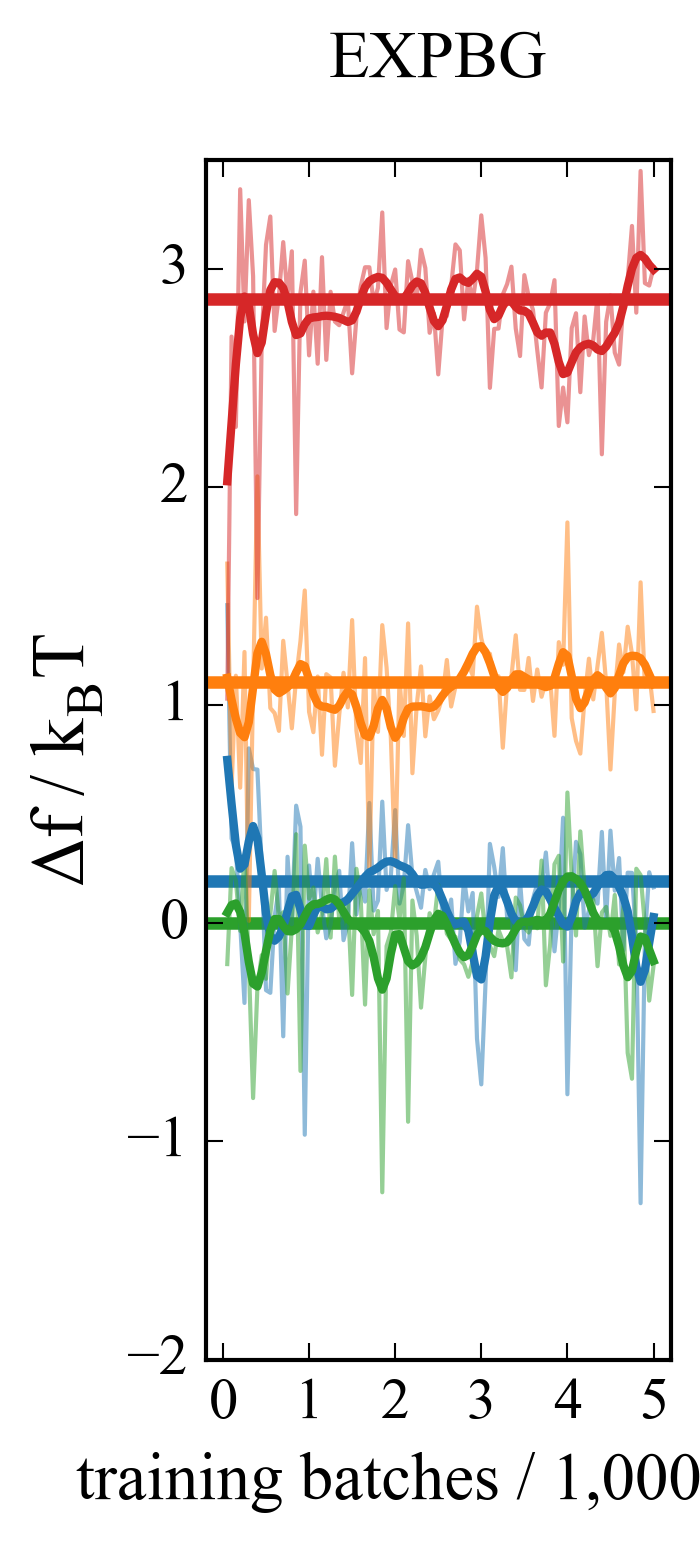

In [88]:
ind_min = np.argmin(delta_f_ground_truth)
print(ind_min)

name =  5 # 12


if type(name) is int:
    start =  10 
    end = 40000000000   
    x = fs_to_deltafs_(estimates[:,:,name].T, ind_min=ind_min, start=start, median=True) # (m,n_states)
    xL = x - np.nan
    xU = x + np.nan
    if name == 0: name = 'AVMD_T'
    elif name == 1: name = 'AVMD_V'
    elif name == 2:
        name = 'AVBG'
        x = fs_to_deltafs_(np.array(av_BG.T), ind_min=ind_min, start=start)
        xL = x - np.nan
        xU = x + np.nan
    elif name == 3: name = 'EXPMD_T'
    elif name == 4: name = 'EXPMD_V'
    elif name == 5: name = 'EXPBG'
    elif name == 6: name = 'BAR_T (weighted average)'
    elif name == 7: name = 'BAR_V (weighted average)'
    elif name == 11: name = 'BAR_T (direct average)'
    elif name == 12: name = 'BAR_V (direct average)'
    else: print('not')
else: pass

#x-= 0.5
fig = plt.figure(figsize=(2,5),dpi=300, facecolor="white")
[plt.plot([-400,grid[-1]+400],[delta_f_ground_truth[k]]*2, color=default_colours[k], linewidth=3, zorder=-10) for k in range(n_states)]

[plt.plot(grid, x[:,k], color=default_colours[k], alpha=0.5, linewidth=1) for k in range(n_states)]

[plt.fill_between(grid,
                 xL[:,k], # simple_smoother_(xL[:,k],c=0.6),
                 xU[:,k], # simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.2,
                 color='black',
                
                ) for k in range(n_states)]
[plt.fill_between(grid,
                 simple_smoother_(xL[:,k],c=0.6),
                 simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.5,
                 color=default_colours[k],
                
                ) for k in range(n_states)]

[plt.plot(grid, simple_smoother_(x[:,k],c=0.6), color=default_colours[k], linewidth=2) for k in range(n_states)]
# 'C'+str(k)

plt.title(name, size=16, pad=20)
plt.ylim(-2.0,3.5)
plt.xticks([0,1000,2000,3000,4000,5000],[0,1,2,3,4,5])
plt.xlim(-200.0,5200)
plt.xlabel('training batches / 1,000      ', size=16)
plt.ylabel('Δf / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.show()


2


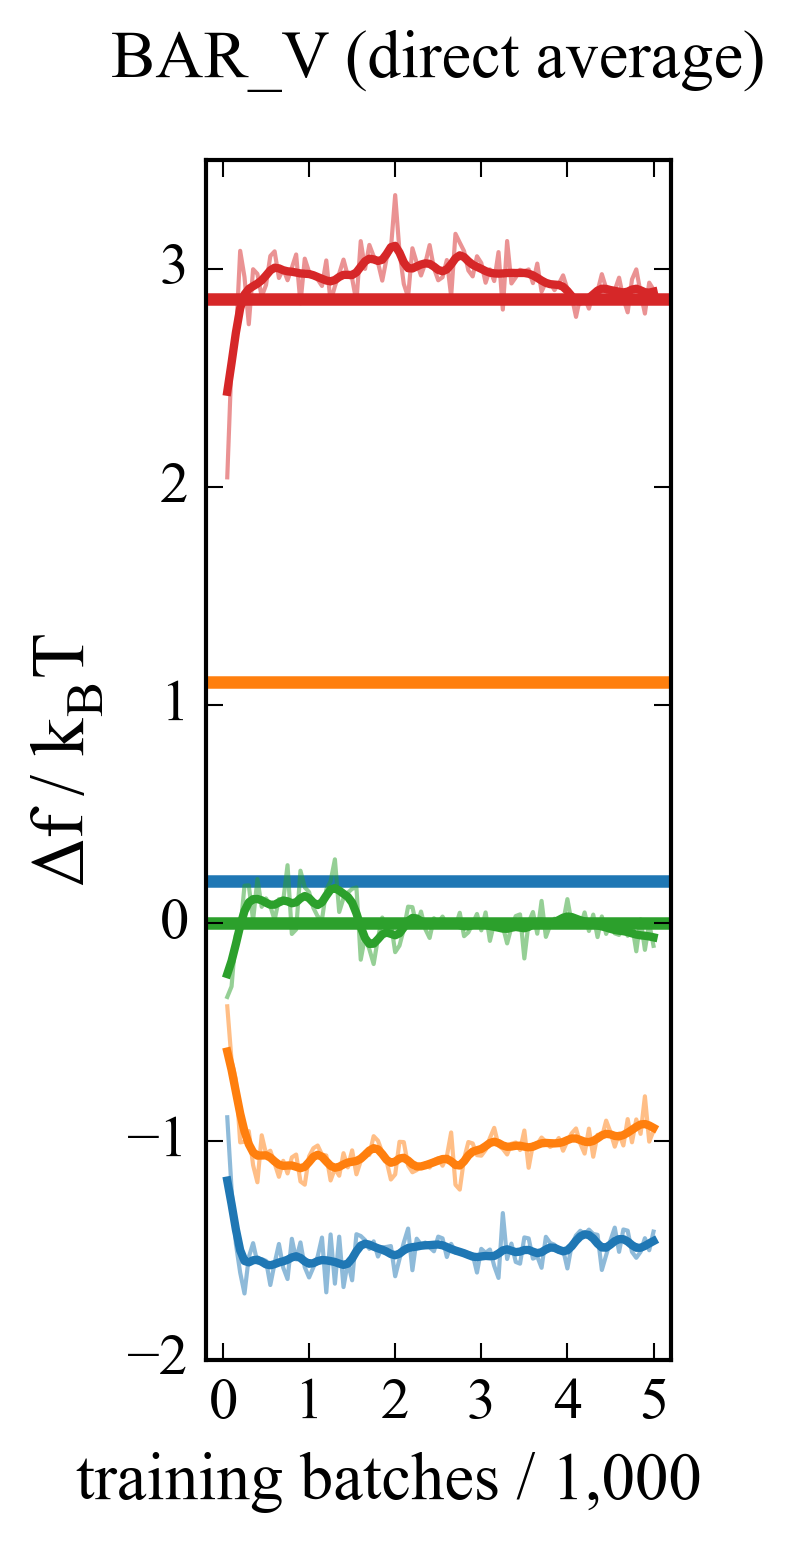

In [85]:
ind_min = np.argmin(delta_f_ground_truth)
print(ind_min)

name =  12 # 12


if type(name) is int:
    start =  10 
    end = 40000000000   
    x = fs_to_deltafs_(estimates[:,:,name].T, ind_min=ind_min, start=start, median=True) # (m,n_states)
    xL = x - np.nan
    xU = x + np.nan
    if name == 0: name = 'AVMD_T'
    elif name == 1: name = 'AVMD_V'
    elif name == 2:
        name = 'AVBG'
        x = fs_to_deltafs_(np.array(av_BG.T), ind_min=ind_min, start=start)
        xL = x - np.nan
        xU = x + np.nan
    elif name == 3: name = 'EXPMD_T'
    elif name == 4: name = 'EXPMD_V'
    elif name == 5: name = 'EXPBG'
    elif name == 6: name = 'BAR_T (weighted average)'
    elif name == 7: name = 'BAR_V (weighted average)'
    elif name == 11: name = 'BAR_T (direct average)'
    elif name == 12: name = 'BAR_V (direct average)'
    else: print('not')
else: pass

#x-= 0.5
fig = plt.figure(figsize=(2,5),dpi=300, facecolor="white")
[plt.plot([-400,grid[-1]+400],[delta_f_ground_truth[k]]*2, color=default_colours[k], linewidth=3, zorder=-10) for k in range(n_states)]

[plt.plot(grid, x[:,k], color=default_colours[k], alpha=0.5, linewidth=1) for k in range(n_states)]

[plt.fill_between(grid,
                 xL[:,k], # simple_smoother_(xL[:,k],c=0.6),
                 xU[:,k], # simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.2,
                 color='black',
                
                ) for k in range(n_states)]
[plt.fill_between(grid,
                 simple_smoother_(xL[:,k],c=0.6),
                 simple_smoother_(xU[:,k],c=0.6),
                 alpha=0.5,
                 color=default_colours[k],
                
                ) for k in range(n_states)]

[plt.plot(grid, simple_smoother_(x[:,k],c=0.6), color=default_colours[k], linewidth=2) for k in range(n_states)]
# 'C'+str(k)

plt.title(name, size=16, pad=20)
plt.ylim(-2.0,3.5)
plt.xticks([0,1000,2000,3000,4000,5000],[0,1,2,3,4,5])
plt.xlim(-200.0,5200)
plt.xlabel('training batches / 1,000      ', size=16)
plt.ylabel('Δf / $\mathregular{k_B}$T', labelpad=5, size=18)
plt.show()
